# Ocena modelu

In [ ]:
# import bibliotek
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn import pipeline
from sklearn import linear_model

Wczytanie danych dotyczących oceny jakości portugalskiego białego wina `Vinho Verde` na podstawie danych z próbek i sensorów. Eksperci oceniali wino w skali od 0 do 10 (bardzo złe i bardzo dobre odpowiednio). [Więcej o danych...](https://bit.ly/2FiwKmy)

In [ ]:
# wczytanie danych
wino_df = pd.read_csv("https://bit.ly/2XYWtqG").drop(columns=["Unnamed: 0"])
wino_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4898 non-null   float64
 1   volatile.acidity      4898 non-null   float64
 2   citric.acid           4898 non-null   float64
 3   residual.sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free.sulfur.dioxide   4898 non-null   float64
 6   total.sulfur.dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# wizualizacja zależności między kolumnami
kolumny = pd.Index(wino_df.columns).tolist()
wykres = px.scatter_matrix(wino_df, dimensions=kolumny[:-1], color="quality")
wykres.update_layout(autosize=False, width=1600, height=1600)
wykres.show()

In [ ]:
# lista cech objaśniających
kolumny[:-1]

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
# utworzenie zbiru cech objasniających i zmiennej objaśnianej
X = wino_df[kolumny[:-1]]
y = wino_df["quality"]

## Krzyżowa walidacja modelu

Zasada działania krzyżowego doboru prób dla stworzenia zbiorów train/test:<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/K-fold_cross_validation_EN.svg" weight="100">

In [ ]:
# tworzenie zestawów danych
X_krzyz = X.values
y_krzyz = y.values

print("X:", X_krzyz, sep="\n")
print("y:", y_krzyz, sep="\n")

X:
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
y:
[6 6 6 ... 6 7 6]


In [ ]:
# utworzenie metody standaryzacji danych
standaryzacja = preprocessing.StandardScaler()
# wybranie metody modelowania
algo = linear_model.LogisticRegression()
# utworzenie procesu standaryzacji i wykorzystania algorytmu regresji logistycznej
proces = pipeline.make_pipeline(standaryzacja, algo)
# zdefiniowanie metody walidacji modelu
# shuffle - tasowanie danych przed wyborem
walidacja = model_selection.KFold(n_splits=5, shuffle=True, random_state=2020)

In [ ]:
# przeprowadzenie krzyżowego sprawdzenia dokładności modelu
walidacja_wynik = model_selection.cross_val_score(proces, 
                                                  X_krzyz,
                                                  y_krzyz,
                                                  cv=walidacja,
                                                  scoring="accuracy",
                                                  n_jobs=-1)

In [ ]:
walidacja_wynik.mean()

0.5359279564737028

### Prosty model regresji logistycznej (bez CV)

In [ ]:
# tworzenie zbiorów uczący/testowy
X_uczacy, X_testowy, y_uczacy, y_testowy = model_selection.train_test_split(X, y 
                                                                            ,test_size = .3 
                                                                            #,random_state = 2020
                                                                            )
# standaryzacja
standaryzacja = preprocessing.StandardScaler()
fit_stand = standaryzacja.fit(X_uczacy)
X_uczacy_stand = fit_stand.transform(X_uczacy)
X_testowy_stand = fit_stand.transform(X_testowy)
# wybranie algorytmu
algo = linear_model.LogisticRegression(n_jobs=-1)
# wyuczenie modelu
algo.fit(X_uczacy_stand, y_uczacy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predykcja na wyuczonym modelu
predykcja = algo.predict(X_testowy_stand)
predykcja

array([5, 6, 6, ..., 5, 5, 6])

In [ ]:
# wyliczenie dokładności modelu
algo.score(X_testowy_stand, y_testowy)

0.5272108843537415

In [ ]:
# więcej metryk
print(metrics.classification_report(y_testowy, predykcja))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        48
           5       0.30      0.28      0.29       436
           6       0.45      0.67      0.54       654
           7       0.14      0.05      0.08       274
           8       0.00      0.00      0.00        51
           9       0.00      0.00      0.00         1

    accuracy                           0.39      1470
   macro avg       0.13      0.14      0.13      1470
weighted avg       0.32      0.39      0.34      1470



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##### Confusion matrix

<img src="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg" weight="100">

In [ ]:
# macierz błędów
metrics.confusion_matrix(y_testowy, predykcja, labels=np.unique(y_testowy))

array([[  0,   0,   0,   3,   1,   0,   0],
       [  0,   0,  13,  36,   7,   0,   0],
       [  0,   1, 135, 325,  26,   1,   0],
       [  0,   1, 181, 390,  49,   0,   0],
       [  0,   1,  60, 185,  13,   0,   1],
       [  0,   0,  11,  26,   2,   0,   0],
       [  0,   0,   1,   0,   1,   0,   0]])

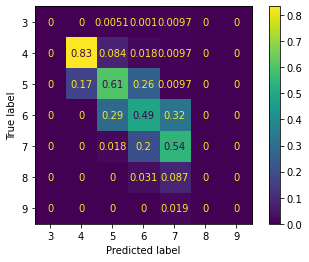

In [ ]:
# macierz błędów - wizualizacja
metrics.plot_confusion_matrix(algo, X_testowy_stand, y_testowy, normalize="pred")
plt.show() 

## Ocena klasyfikatora

### Klasyfikator binarny

In [ ]:
print(X)
print(y)

      fixed.acidity  volatile.acidity  citric.acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

In [ ]:
np.unique(y.values)

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
# tworzenie zbioru z 2 klasami
prog = preprocessing.Binarizer(5)
y_2klasy = prog.fit_transform(y.values.reshape(-1,1))
print(y_2klasy)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
# utworzenie metody standaryzacji danych
standaryzacja = preprocessing.StandardScaler()
# wybranie metody modelowania
algo = linear_model.LogisticRegression()
# utworzenie procesu standaryzacji i wykorzystania algorytmu regresji liniowej
proces = pipeline.make_pipeline(standaryzacja, algo)
# ustawienia walidacji krzyżowej
walidacja = model_selection.KFold(n_splits=10, shuffle=True, random_state=2020)
# tworzenie modelu ze sprawdzeniem krzyżowym dokładności
model_selection.cross_val_score(proces, 
                                X, 
                                y_2klasy, 
                                cv = walidacja, #None - domyślnie 5CV
                                scoring = "accuracy", 
                                n_jobs = -1).mean()

0.7486699219565127

#### Pewność

In [ ]:
# tworzenie modelu ze sprawdzeniem krzyżowym pewności
model_selection.cross_val_score(proces, 
                                X, 
                                y_2klasy, 
                                cv = walidacja,
                                scoring = "recall", 
                                n_jobs = -1).mean()

0.878249142402898

#### Precyzja

In [ ]:
# tworzenie modelu ze sprawdzeniem krzyżowym precyzji
model_selection.cross_val_score(proces, 
                                X, 
                                y_2klasy, 
                                cv = walidacja,
                                scoring = "precision", 
                                n_jobs = -1).mean()

0.7740059789320578

#### F1-score

Wzór na średnia harmoniczna F1, która jest jedną z miar dokładności modelu:<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-71d99f821819c3777bfab9b461864f01">

In [ ]:
# tworzenie modelu ze sprawdzeniem krzyżowym wskaźnika F1
model_selection.cross_val_score(proces, 
                                X, 
                                y_2klasy, 
                                cv = walidacja,
                                scoring = "f1", 
                                n_jobs = -1).mean()

0.8228159036951505

#### Krzywa ROC

Receiving Operating Characteristic (ROC) - metoda oceny jakości klasyfikatora binarnego.

In [ ]:
# tworzenie zbiorów uczący/testowy
X_uczacy, X_testowy, y_uczacy, y_testowy = model_selection.train_test_split(X, y_2klasy 
                                                                            ,test_size = .3 
                                                                            ,random_state = 2020
                                                                            )
# standaryzacja
standaryzacja = preprocessing.StandardScaler()
fit_stand = standaryzacja.fit(X_uczacy)
X_uczacy_stand = fit_stand.transform(X_uczacy)
X_testowy_stand = fit_stand.transform(X_testowy)
# wybranie algorytmu
algo = linear_model.LogisticRegression(n_jobs=-1)
# wyuczenie modelu
algo.fit(X_uczacy_stand, y_uczacy)
# pobranie prawdopodobieństwa z predykcji
pred_prawd = algo.predict_proba(X_testowy)[:,1]
print(pred_prawd)

[0.99999401 0.9999314  0.99999888 ... 0.99996904 0.99999831 0.43562953]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
np.round(algo.predict_proba(X_testowy)[1,], decimals=2)

array([0., 1.])

In [ ]:
# wyliczenie metryk TPR(true positive rate) i FPR(false positive rate)
FP_value, TP_value, prog_prawd = metrics.roc_curve(y_testowy, pred_prawd)

In [ ]:
# powierzchnia pod krzywą ROC
ROC_score = metrics.roc_auc_score(y_testowy, pred_prawd)
print(ROC_score)

0.6200168608727589


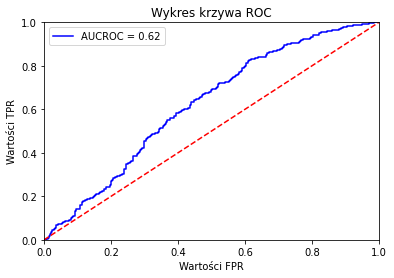

In [ ]:
# wykrwes krzywej ROC
plt.plot(FP_value, TP_value, "b", label = "AUCROC = %0.2f" % ROC_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "upper left")
plt.ylabel("Wartości TPR")
plt.xlabel("Wartości FPR")
plt.title("Wykres krzywa ROC")
plt.show()

### Klasyfikator wieloklasowy

In [ ]:
print(X)
print(y)

      fixed.acidity  volatile.acidity  citric.acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

In [ ]:
np.unique(y.values)

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
# tworzenie zbioru z 2 klasami
y_3klasy = np.digitize(y, bins=[5,7])
print("Unikalne klasy:", np.unique(y_3klasy), sep="\n")

Unikalne klasy:
[0 1 2]


In [ ]:
# wybranie metody modelowania
algo = linear_model.LogisticRegression()
# tworzenie modelu ze sprawdzeniem krzyżowym dokładności
model_selection.cross_val_score(algo, 
                                X, 
                                y_3klasy, 
                                cv=10,
                                scoring = "accuracy", 
                                n_jobs = -1).mean()

0.7556095321564209

#### _macro

Średnia z ocen poszczególnych klas

In [ ]:
# wybranie metody modelowania
algo = linear_model.LogisticRegression()
# tworzenie modelu ze sprawdzeniem krzyżowym F1
model_selection.cross_val_score(algo, 
                                X, 
                                y_3klasy, 
                                scoring = "f1_macro", 
                                n_jobs = -1).mean()

0.373163676462741

#### _micro

Średnia z ocen grup obserwacji i klasy.

In [ ]:
# wybranie metody modelowania
algo = linear_model.LogisticRegression()
# tworzenie modelu ze sprawdzeniem krzyżowym F1
model_selection.cross_val_score(algo, 
                                X, 
                                y_3klasy, 
                                scoring = "f1_micro", 
                                n_jobs = -1).mean()

array([0.75102041, 0.75102041, 0.77244898, 0.77425945, 0.74361593])

#### _weighted

Średnia z ocen poszczególnych klas z uwzględnieniem ich wielkości w zbiorze.

In [ ]:
# wybranie metody modelowania
algo = linear_model.LogisticRegression()
# tworzenie modelu ze sprawdzeniem krzyżowym F1
model_selection.cross_val_score(algo, 
                                X, 
                                y_3klasy, 
                                scoring = "f1_weighted", 
                                n_jobs = -1).mean()

0.6954800753038869

## Ocena modelu regresji

In [ ]:
print(X)
print(y)

      fixed.acidity  volatile.acidity  citric.acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

In [ ]:
# tworzenie zestawów danych
X_reg = X.drop(columns=["alcohol"]).values
y_reg = X["alcohol"].values

print("X:", X_reg, sep="\n")
print("\n")
print("y:", y_reg, sep="\n")

X:
[[7.      0.27    0.36    ... 1.001   3.      0.45   ]
 [6.3     0.3     0.34    ... 0.994   3.3     0.49   ]
 [8.1     0.28    0.4     ... 0.9951  3.26    0.44   ]
 ...
 [6.5     0.24    0.19    ... 0.99254 2.99    0.46   ]
 [5.5     0.29    0.3     ... 0.98869 3.34    0.38   ]
 [6.      0.21    0.38    ... 0.98941 3.26    0.32   ]]


y:
[ 8.8  9.5 10.1 ...  9.4 12.8 11.8]


#### MSE

Mean squared error (MSE) - błąd średniokwadratowy. Wzór:<br>
<img src="https://miro.medium.com/max/808/1*-e1QGatrODWpJkEwqP4Jyg.png">

In [ ]:
# wybranie metody modelowania
algo_reg = linear_model.LinearRegression()
# tworzenie modelu ze sprawdzeniem krzyżowym niegatywnego błędu średniokwadratowego - MSE
model_selection.cross_val_score(algo_reg, 
                                X_reg, 
                                y_reg, 
                                scoring = "neg_mean_squared_error",
                                n_jobs=-1).mean()

-0.22121434002203552

#### R^2

Współczynnik determinacji R² (Coefficient of determination) – jedna z miar jakości dopasowania modelu do danych uczących. Wzór:<br>
<img src="https://akademiadatascience.s3-eu-west-1.amazonaws.com/materialy/sds/modul6/r2.png">

In [ ]:
# tworzenie modelu ze sprawdzeniem krzyżowym współczynnika determinacji R^2
model_selection.cross_val_score(algo_reg, 
                                X_reg, 
                                y_reg, 
                                scoring = "r2",
                                n_jobs=-1).mean()

0.8341620235831044